## Source Code for the Employee Performance Project

In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from collections import Counter
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb

In [2]:
data=pd.read_excel('Employee_Performance.csv')

### Basic Dataset Analysis

In [3]:
data.head()

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,E1001000,32,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,10,3,...,4,10,2,2,10,7,0,8,No,3
1,E1001006,47,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,14,4,...,4,20,2,3,7,7,1,7,No,3
2,E1001007,40,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Frequently,5,4,...,3,20,2,3,18,13,1,12,No,4
3,E1001009,41,Male,Human Resources,Divorced,Human Resources,Manager,Travel_Rarely,10,4,...,2,23,2,2,21,6,12,6,No,3
4,E1001010,60,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,16,4,...,4,10,1,3,2,2,2,2,No,3


In [4]:
data.shape

(1200, 28)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 28 columns):
EmpNumber                       1200 non-null object
Age                             1200 non-null int64
Gender                          1200 non-null object
EducationBackground             1200 non-null object
MaritalStatus                   1200 non-null object
EmpDepartment                   1200 non-null object
EmpJobRole                      1200 non-null object
BusinessTravelFrequency         1200 non-null object
DistanceFromHome                1200 non-null int64
EmpEducationLevel               1200 non-null int64
EmpEnvironmentSatisfaction      1200 non-null int64
EmpHourlyRate                   1200 non-null int64
EmpJobInvolvement               1200 non-null int64
EmpJobLevel                     1200 non-null int64
EmpJobSatisfaction              1200 non-null int64
NumCompaniesWorked              1200 non-null int64
OverTime                        1200 non-null object
E

## Feature Selection Based on Correlation

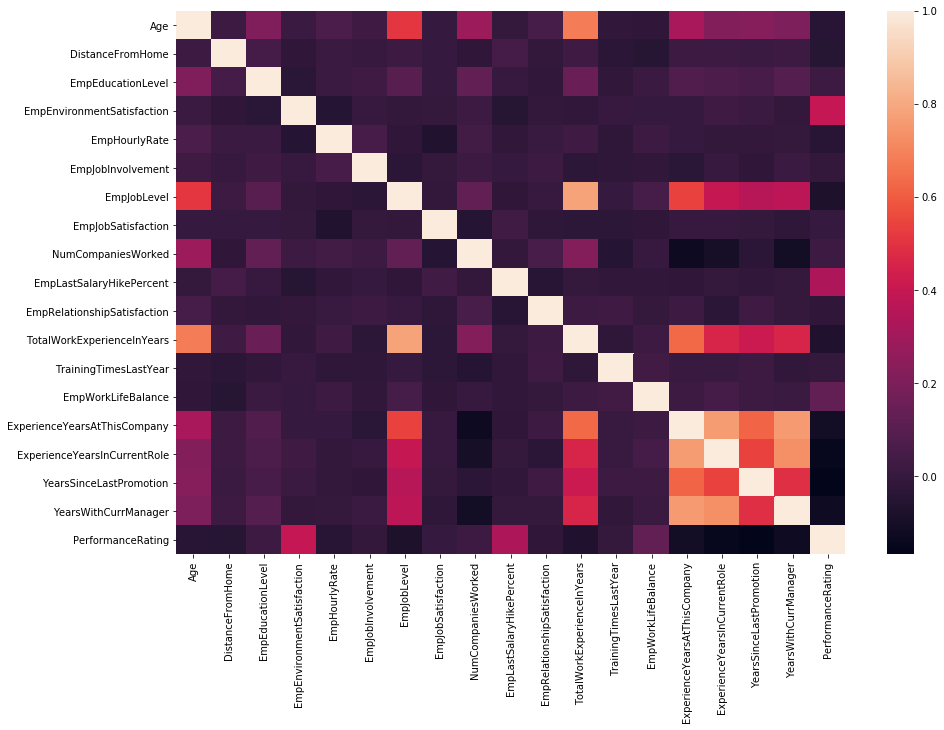

In [6]:
fig, ax = plt.subplots(figsize=(15,10))
sb.heatmap(data.corr(),xticklabels=True,yticklabels=True,ax=ax)


#DEDUCTIONS of heatmap

#TotalWorkExp is highly correlated with EmpJobLevel
#EXPinthiscompany is highly correlated with CUrrManager
#Expinthiscom is highly correlated with Expcurrrole
#CUrrrole is highly correlated with currmanager

#Furthur Deduction
#expincomp,currmanager,currrole are highly correlated

## Data Preprocessing

In [7]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [8]:
data.columns

Index(['EmpNumber', 'Age', 'Gender', 'EducationBackground', 'MaritalStatus',
       'EmpDepartment', 'EmpJobRole', 'BusinessTravelFrequency',
       'DistanceFromHome', 'EmpEducationLevel', 'EmpEnvironmentSatisfaction',
       'EmpHourlyRate', 'EmpJobInvolvement', 'EmpJobLevel',
       'EmpJobSatisfaction', 'NumCompaniesWorked', 'OverTime',
       'EmpLastSalaryHikePercent', 'EmpRelationshipSatisfaction',
       'TotalWorkExperienceInYears', 'TrainingTimesLastYear',
       'EmpWorkLifeBalance', 'ExperienceYearsAtThisCompany',
       'ExperienceYearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'Attrition', 'PerformanceRating'],
      dtype='object')

### To find categorial columns in the whole dataset

In [9]:
col=data.columns
num_col=data._get_numeric_data().columns
list(set(col)-set(num_col))

['BusinessTravelFrequency',
 'EmpDepartment',
 'EmpNumber',
 'MaritalStatus',
 'OverTime',
 'Attrition',
 'EmpJobRole',
 'EducationBackground',
 'Gender']

### LabelEncoding the Categorical data

In [10]:
var=['EmpDepartment','OverTime','BusinessTravelFrequency','MaritalStatus','Gender','EmpJobRole','EmpNumber','Attrition','EducationBackground']
for i in var:

    data[i]=le.fit_transform(data[i])

## Important Features as X, Target Variable as y

In [11]:
X=data.loc[:,['Age', 'Gender', 'EducationBackground', 'MaritalStatus', 'EmpJobRole','BusinessTravelFrequency','DistanceFromHome', 'EmpEducationLevel', 'EmpEnvironmentSatisfaction','EmpHourlyRate', 'EmpJobInvolvement', 'EmpJobLevel','EmpJobSatisfaction', 'NumCompaniesWorked', 'OverTime','EmpLastSalaryHikePercent', 'EmpRelationshipSatisfaction','TotalWorkExperienceInYears', 'TrainingTimesLastYear','EmpWorkLifeBalance', 'ExperienceYearsAtThisCompany','ExperienceYearsInCurrentRole', 'YearsSinceLastPromotion', 'Attrition']]

In [12]:
y=data.PerformanceRating

## Splitting the Processed Data into Train and Test

In [13]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.25,random_state=42,stratify=data.PerformanceRating)

## Model to Fit and Predict - Random Forest Classifier

In [14]:
from sklearn.ensemble import RandomForestClassifier

In [15]:
rf=RandomForestClassifier(random_state=42)

In [16]:
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [17]:
yp=rf.predict(X_test)

## Model to Fit and Predict - XGB Classifier

In [18]:
import xgboost as xgb

In [19]:
xg=xgb.XGBClassifier()

In [20]:
xg.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='multi:softprob', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [21]:
ypx=xg.predict(X_test)

C:\Users\Vaishak P J\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


## Accuracy score for both Models

In [22]:
#Accuracy SCore for Random Forest
accuracy_score(y_test,yp)

0.91

In [23]:
#Accuracy Score for XGBoost
accuracy_score(y_test,ypx)

0.9266666666666666